#### pip install tensorflow
#### dll 에러 뜨면, pip install tensorflow==1.5
- windows 10 은 1.6 error 

### tensorflow
- google이 만든 머신러닝을 위한 library
- 데이터가 흐르는 그래프

### 구성요소
- 1. node : 수학적인 연산을 담당, 데이터의 입출력
- 2. Tensor : 다차원 array(matrix)
- 3. edge : 한 node가 가지고있는 tensor를 다른 node로 이동
- node, tensor, edge로 하나의 그래프를 만들 수 있다
- 그래프를 실행시키기위해서는 실행자가 있어야함
    - runner(session)를 통해 실행

#### 자료타입
- 상수(Constant)
- 변수(Veriable)
- 심볼릭변수(placeholder)

In [1]:
import tensorflow as tf


my_node =tf.constant("Hello World")

sess = tf.Session() # session, runner(node를 실행시키는 실행자)
print(sess.run(my_node)) # 실행시켜줌

# 앞의 b는 문자열이 byte계열임을 지칭, 일반 문자열로 바꿔주기위해서는 decode
print(sess.run(my_node).decode())

#shpae => ()이면 scalar값임을 알려줌
print(my_node)

b'Hello World'
Hello World
Tensor("Const:0", shape=(), dtype=string)


In [8]:
import tensorflow as tf
import numpy as np
import pandas as pd

x_data = [1,2,3]
y_data = [1,2,3]

m = len(x_data)

x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

W = tf.Variable(tf.random_normal([1,]), tf.float32)
#b = tf.Variable(tf.random_normalom([1,]), tf.float32)
# Hypothiesis
H = tf.multiply(x,W)
# cost function
cost = 0.05*((tf.reduce_sum((W-y)*x))/m)
train = W - cost
W.assign(train)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _,cost_value, weight_value = sess.run([train,cost,W], feed_dict = {x:x_data, y:y_data})
    if step % 300 == 0:
        print("cost : {}, weight : {}".format(cost_value, weight_value))

cost : -0.2839032709598541, weight : [-0.50569904]
cost : -0.2839032709598541, weight : [-0.50569904]
cost : -0.2839032709598541, weight : [-0.50569904]
cost : -0.2839032709598541, weight : [-0.50569904]
cost : -0.2839032709598541, weight : [-0.50569904]
cost : -0.2839032709598541, weight : [-0.50569904]
cost : -0.2839032709598541, weight : [-0.50569904]
cost : -0.2839032709598541, weight : [-0.50569904]
cost : -0.2839032709598541, weight : [-0.50569904]
cost : -0.2839032709598541, weight : [-0.50569904]


##### 간단한 수학 연산

In [17]:

import tensorflow as tf
import numpy as np

node1 = tf.constant(10, dtype=tf.float32) # np.float32넣으면 내부적으로 tensor타입으로 바꿔주긴함
node2 = tf.constant(10, dtype=tf.float32)

#node3에 node1,node2 edge가 연결
node3 = node1+node2 # tf.add(node1,node2)

sess = tf.Session()

print(sess.run(node3))
print(sess.run([node1,node2,node3]))


20.0
[10.0, 10.0, 20.0]


##### placeholder (데이터를 받아들이는 그릇) - 변수는 아님

In [25]:
import tensorflow as tf

node1 = tf.placeholder(dtype=tf.float32)
node2 = tf.placeholder(dtype=tf.float32)
node3 = node1 + node2

sess = tf.Session()
# dictinoary 형태로 값을 placeholder에 넘겨줌
sess.run(node3, feed_dict={node1:[1,2,3], node2:[4,5,6]})

array([5., 7., 9.], dtype=float32)

In [29]:
import tensorflow as tf

node1 = tf.constant(3, dtype=tf.float32)
# Const_~는 몇번째 상수인지, shape=()이기때문에 scalar
display(node1)
node2 = tf.constant([1,2,3], dtype=tf.float32)
display(node2)

<tf.Tensor 'Const_21:0' shape=() dtype=float32>

<tf.Tensor 'Const_22:0' shape=(3,) dtype=float32>

#### 간단한 linear regression을 이용한 machine learning
- 1. training data set
- 2. Hypothesis : H(x) = Wx + b
- 3. Cost function정의
- 4. Cost function의 minimize

In [49]:
import tensorflow as tf

# 1. training data set
x_data = [1,2,3] # 독립변수, 입력데이터
y_data = [3,5,7] # 종속변수, 입력데이터의 label

# placeholder 
x = tf.placeholder(dtype=tf.float32)
y = tf.placeholder(dtype=tf.float32)

# 2. Hypothesis(가설) H(x) = Wx + b 를 프로그램적으로 표현하기 위해
# Weight 와 bias 를 정의
# 처음에는 랜덤한 값을 넣어줌 - tensorflow의 random_normal 사용,, 정규분포에서 랜덤 값 추출, default 
# tf.random_normal() 안에 배열형태로 몇개 뽑을지 , name = 내부적으로 사용할 이름
W = tf.Variable(tf.random_normal([1]), name ="weight")
b = tf.Variable(tf.random_normal([1]), name ="bias")
# Hypothesis ( 최종적으로 알아내야 하는 직선), 데이터에 가장 인접한 직선 예측모델이 만들어지면 예측 가능
H = W * x + b

# 3. Cost function(= Loss function, 비용함수)
# Const function이 최소가되는 W와 b값을 구하는게 목표
# tf.square 는 제곱
# tf.reduce_mean 은 평균
cost = tf.reduce_mean(tf.square((H - y)))

# cost function의 minimize
# 경사하강기법 사용
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.005)
# optimizer가지고 현재 cost값에서 그거보다 작은형태로 한단계 줄임
train = optimizer.minimize(cost)

# 그래프를 실행시키기 위한 session
sess = tf.Session()
# Variable을 사용할 경우 초기화를 시켜줘야함
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _, w_val, b_val, cost_val = sess.run([train,W,b,cost],feed_dict={x:x_data, y:y_data})
    if step % 300 == 0:
        print("weight : {}, bias : {}, cost : {}".format(w_val,b_val,cost_val))
        
### Prediction
sess.run(H, feed_dict={x:10})

weight : [0.04396537], bias : [0.6151161], cost : 23.55230140686035
weight : [1.8778049], bias : [1.2777784], cost : 0.01109583955258131
weight : [1.9148157], bias : [1.1936436], cost : 0.005392236169427633
weight : [1.9406171], bias : [1.1349912], cost : 0.0026204362511634827
weight : [1.9586031], bias : [1.0941044], cost : 0.0012734606862068176
weight : [1.9711416], bias : [1.0656018], cost : 0.0006188668194226921
weight : [1.9798825], bias : [1.045732], cost : 0.00030074629466980696
weight : [1.9859755], bias : [1.0318809], cost : 0.0001461611973354593
weight : [1.9902234], bias : [1.0222244], cost : 7.10252279532142e-05
weight : [1.9931844], bias : [1.0154932], cost : 3.451972588663921e-05


array([20.963242], dtype=float32)

#### ml 정리
- Explicit programmin으로 해결 못하는 - (경우의 수가 너무 많은)문제들을 해결
- 두 가지로 기준이 나뉨 
    - Supervised Learning(지도 학습)
        - (입력 parameter + label 데이터)를 통해 학습
        - 3가지 정도로 나뉨
            - Linear Regression
                - y축 label이 이산값이 아니라 연속적인 값
                - 통계에서 들고 온 것
            - Logistic Regression ( Binary Classification)
                - 회귀 중에 분류를 함
            - Multinomial Classification
                - 여러 범주중에서 분류
                
    - Unsupervised Learning(비지도 학습)
        - label화 되지 않은 데이터를 통해 학습
- 회귀분석 ( Regression Analysis )
    - 통계적 가설 검정 일반적으로 2개의 파라미터가 서로 연관이 있는지에 대해 검정을 했었는데 Regression 또한 같은개념
    - 검정 종류의 하나 일 뿐 
        - 두 개의 파라미터가 서로 연관이 있는지
    - 예측이 가능함
    
- Linear Regression 
    - 데이터가 주어졌을때 해당 데이터를 가장 잘 표현하는 선을 그음
    - 선을 찾기위한 1차함수의 기울기와 절편을 구함
    - Hypothesis(가설) : H(x) = Wx + b
    - 직선이 가장 잘 맞는 걸 찾기 위해
        - 1. 기대값,공분산을 이용하는 방식
        - 2. 최소제곱법
            - 선과 실 데이터간의 차이를 구해 제곱을해서 평균을 냄
            - 그 차가 가장 작은 선을 찾음
            - Cost(W,b)

#### 기본적인 Linear Regression 예제

- 표준화 or 일반화 필요

cost_value : 1295.1763916015625, w_value : [-0.5137321]
cost_value : 4.517247200012207, w_value : [2.0956378]
cost_value : 3.860111713409424, w_value : [2.0588408]
cost_value : 3.40836763381958, w_value : [2.028331]
cost_value : 3.0978164672851562, w_value : [2.003035]
cost_value : 2.8843283653259277, w_value : [1.9820611]
cost_value : 2.737567186355591, w_value : [1.9646711]
cost_value : 2.6366755962371826, w_value : [1.9502529]
cost_value : 2.5673179626464844, w_value : [1.9382983]
cost_value : 2.5196380615234375, w_value : [1.9283864]


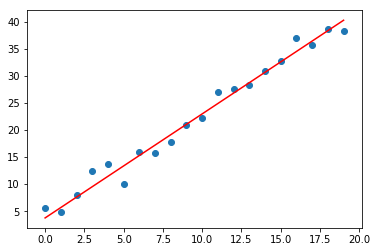

In [42]:
import tensorflow as tf
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(0)
# training data set - 입력 파라미터 + label
x_data = np.arange(0,20,1)
y_data = [t*2+(np.random.normal(2,2)) for t in x_data]

#plt.scatter(x_data,y_data)
#plt.show()

# placeholder
X = tf.placeholder(dtype=tf.float32)
Y = tf.placeholder(dtype=tf.float32)

# Weight * bias
# 값이 변하니까 Variable
# shape을 대괄호로 표현, 몇차원으로 만들건지를 안에 넣어줌
W = tf.Variable(tf.random_normal([1,], dtype=tf.float32), name = "weight")
b = tf.Variable(tf.random_normal([1,], dtype=tf.float32), name = "bias")

# Hypothesis
H = W*X+b

# Cost Function
cost = tf.reduce_mean(tf.square(H-Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.0007).minimize(cost)

# Session 초기화
sess = tf.Session()
# 변수 초기화
sess.run(tf.global_variables_initializer())

# 트레이닝 한번 트레이닝 시키면 1 epoch
for step in range(5000):
    _, cost_value, w_value = sess.run([train, cost, W], feed_dict={X:x_data, Y:y_data})
    if step % 500 == 0 :
        print("cost_value : {}, w_value : {}".format(cost_value,w_value))

# 입력 데이터에 대한 처리가 이루어져야 정상적으로 학습이 진행
x_line = np.arange(0,20,1)
y_line = np.array([sess.run(W)*t+sess.run(b) for t in x_line])

plt.plot(x_line, y_line, "r")
plt.scatter(x_data, y_data)
plt.show()

### cost functino wieght로 미분
- costfunction이 0 이되는 값의 weight를 찾아야하는데 weight로 미분하면 0이 되는 값인 기울기가 0인 지점을 찾을 수 있음 
- 미분은 어떤 함수의 정의역 속 각 점에서의 함숫값의 변화량과 독립 변숫값의 변화량의 비의 극한 혹은 극한들로 치역이 구성되는 새로운 함수이다
- 즉, 그래프의 접선을 구할 수 있고 그 접선의 기울기를 알 수  있다 
- W = W - a(learning rate)*cost접선의 기울기 로 weight를 갱신해준다
![image](https://user-images.githubusercontent.com/28910538/53535356-dbec7600-3b45-11e9-8027-af74d974b3bc.png)


cost_value : 0.0009046575869433582, weight_value : [1.8722186]
cost_value : 0.00022235697542782873, weight_value : [1.7266937]
cost_value : 5.4653966799378395e-05, weight_value : [1.6909251]
cost_value : 1.3434173524728976e-05, weight_value : [1.6821334]
cost_value : 3.301779543107841e-06, weight_value : [1.6799723]
cost_value : 8.120537131617311e-07, weight_value : [1.6794413]
cost_value : 2.0066897832293762e-07, weight_value : [1.6793109]
cost_value : 5.912781020356306e-08, weight_value : [1.6792808]
cost_value : 5.912781020356306e-08, weight_value : [1.6792808]
cost_value : 5.912781020356306e-08, weight_value : [1.6792808]


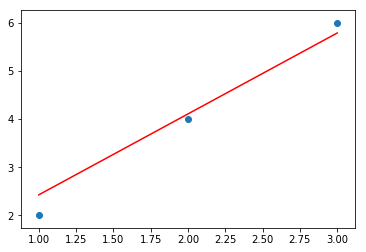

In [55]:
x_data = [1.,2.,3.]
y_data = [2.,4.,6.]

X = tf.placeholder(dtype=tf.float32)
Y = tf.placeholder(dtype=tf.float32)

W = tf.Variable(tf.random_normal([1], dtype=tf.float32))
b = tf.Variable(tf.random_normal([1], dtype=tf.float32))

h = W*X
n = len(x_data)
cost = 0.0005 * tf.reduce_sum(X*((W*X)+b-Y))*(2/n)

train = tf.assign(W, W-cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3000): 
    _, cost_value, w_value = sess.run([train,cost, W], feed_dict={X:x_data, Y:y_data})
    if step % 300 == 0:
        print("cost_value : {}, weight_value : {}".format(cost_value, w_value))

plt.plot(x_data, sess.run(W)*x_data+sess.run(b),"r")
plt.scatter(x_data, y_data)
plt.show()


### 하지만 gradient descent의 문제점
- Global Minima를 못찾을 수도 있음

### Cost Function은 반드시 Convex Function의 형태를 띄도록해야함

##### 온도에 따른 ozone량 예측
- Simple Linear Regression은 독립변수가 하나
- 독립변수와 종속변수가 같은 단위의 데이터면 상관이 없지만, 다른 값과 다른 단위면 학습하는데 문제가 있음
    - 어떤 경우에는 표준화가 더 잘되고, 어떤 경우에는 일반화가 학습이 더 잘 됨
    - 표준화 (standardization) 
![image](https://user-images.githubusercontent.com/28910538/53537777-6e911300-3b4e-11e9-87fe-2df49a782ecf.png)

    - 일반화 (normalization)
![image](https://user-images.githubusercontent.com/28910538/53537751-57522580-3b4e-11e9-813c-f7ca0c60df73.png)




In [171]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

file_path = "./data/ozone/ozone.csv"
# sep를 안주면 default로 ","
pd_ozone = pd.read_csv(file_path, sep=",")
display(pd_ozone.head(6))
print(pd_ozone.shape)
# drop na
pd_oz_tp = pd_ozone[["Ozone","Temp"]].copy()
pd_oz_tp.dropna(how="any", inplace=True)
display(pd_oz_tp.head(6))
print(pd_oz_tp.shape)

temp_data = pd_oz_tp["Temp"]
ozone_data = pd_oz_tp["Ozone"]


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6


(153, 6)


,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
5,28.0,66
6,23.0,65


(116, 2)


In [175]:
########################################################################
def std(data):
    a = np.sqrt(np.mean((data - np.mean(data))**2))
    return (data - np.mean(data))/a
def nor(data):
    return (data - np.min(data))/(np.max(data)-np.min(data))
####################### Standardization
temp_data_std = std(temp_data)
print(temp_data_std.head())
ozone_data_std = std(ozone_data)
######################## Normalization
temp_data_nor = nor(temp_data)
print(temp_data_nor.head())
ozone_data_nor = nor(ozone_data)


0   -1.151006
1   -0.621598
2   -0.409835
3   -1.680414
5   -1.256888
Name: Temp, dtype: float64
0    0.250
1    0.375
2    0.425
3    0.125
5    0.225
Name: Temp, dtype: float64


##### 표준화 (standardization)

cost_value : 3.7957870960235596, weight_value : [-0.94531167]
cost_value : 0.5122928023338318, weight_value : [0.69828945]
cost_value : 0.5122928023338318, weight_value : [0.6983574]
cost_value : 0.5122928023338318, weight_value : [0.6983574]
cost_value : 0.5122928023338318, weight_value : [0.6983574]


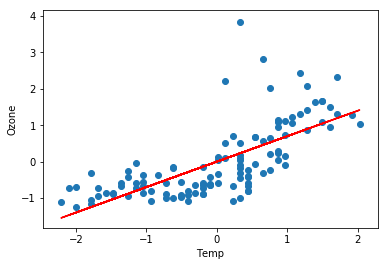

In [179]:
X = tf.placeholder(dtype=tf.float32)
Y = tf.placeholder(dtype=tf.float32)

W = tf.Variable(tf.random_normal([1,],dtype=tf.float32),name="weight")
b = tf.Variable(tf.random_normal([1,],dtype=tf.float32),name="bias")

h = W*X+b
cost = tf.reduce_mean(tf.square(h-Y))

train = tf.train.GradientDescentOptimizer(learning_rate=0.005).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(5000):
    _, cost_value, weight_value = sess.run([train,cost, W], feed_dict={X:temp_data_std, Y:ozone_data_std})
    if step % 1000 == 0:
        print("cost_value : {}, weight_value : {}".format(cost_value,weight_value))


x_line = temp_data_std
y_line = sess.run(W)*x_line+sess.run(b)
plt.plot(x_line,y_line,"r" )
plt.scatter( temp_data_std,ozone_data_std)
plt.xlabel("Temp")
plt.ylabel("Ozone")

plt.show()


##### 일반화 ( Normalization )

cost_value : 0.03452238813042641, weight_value : [0.6915479]
cost_value : 0.019816868007183075, weight_value : [0.5825721]
cost_value : 0.019816827028989792, weight_value : [0.5817373]
cost_value : 0.019816827028989792, weight_value : [0.5817308]
cost_value : 0.019816827028989792, weight_value : [0.5817308]


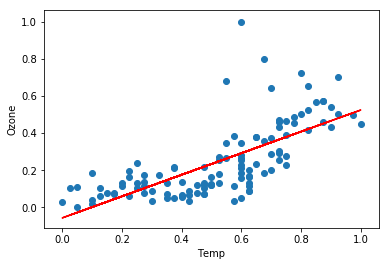

In [178]:
for step in range(5000):
    _, cost_value, weight_value = sess.run([train,cost, W], feed_dict={X:temp_data_nor, Y:ozone_data_nor})
    if step % 1000 == 0:
        print("cost_value : {}, weight_value : {}".format(cost_value,weight_value))


x_line = temp_data_nor
y_line = sess.run(W)*x_line+sess.run(b)
plt.plot(x_line,y_line,"r" )
plt.scatter( temp_data_nor,ozone_data_nor)
plt.xlabel("Temp")
plt.ylabel("Ozone")

plt.show()

##### scipy

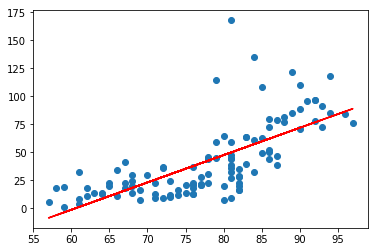

In [185]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

# Data load
data = pd.read_csv("./data/ozone/ozone.csv", sep = ",")
df = data.dropna(how = "any", inplace=False)

# 독립변수와 종속변수 뽑
x_data = df["Temp"]
y_data = df["Ozone"]

# linear regression
# slope : 기울기
# interecept : y절편(b)상
# ravlue = 상관계수(-1과 ~ 1 사이의 실수 0에가까우면 두개의 변수가 서로 관련이 없, 절대값이 1로 워 질 수록 관련이 있음)
 
result = stats.linregress(x_data,y_data)
w = result[0]
b = result[1]
plt.scatter(x_data,y_data)
plt.plot(x_data, w * x_data + b, "r")
plt.show()

### Multi-variable(multiple) linear regression 다중 선형 회귀
- 여러 개의 input을 이용한 linear regression
- 변수가 여러개이기 때문에 Hypothesis도 바뀜
- H(x) = Wx + b => H(x1,x2,x3) = w1x1 + w2x2 + w3x3 + b
    - 다항시이 될 뿐(bias 즉 y절편은 하나)
- 데이터가 많아졌으니 Matrix 이용해서 해결
    - 이 전에는 1차원 배열이면 됐는데 3개로 늘어났
        - 2차원으로 늘어났음 (Matrix)
- H(X) = XW + b 

### matrix는 반드시 shape을 잡아줘야 함
- placeholder선언시
    - 대괄호로 표현, 행과 열의 갯수

In [401]:
b = np.array([[1,1,2],
             [2,7,2],
             [3,1,2],
             [4,1,3],
             [5,8,3],
             [6,1,1],])
b.reshape((3,6))

array([[1, 1, 2, 2, 7, 2],
       [3, 1, 2, 4, 1, 3],
       [5, 8, 3, 6, 1, 1]])

In [417]:
a = np.array([[1,2,3],
             [1,2,3],
             [1,2,3],
             [5,2,3],
             [1,5,3],
             [1,2,5],
             [1,2,3]])
print()


array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

In [80]:
def mul_std_2d(data):
    m = np.mean(data, axis=0)
    s = np.sqrt(np.mean((np.square(data - m)), axis=0))
    return (data-m)/s
##############
def mul_nor_2d(data):
    return (data - np.min(data, axis=0))/(np.max(data, axis=0)- np.min(data, axis=0))

In [81]:
import tensorflow as tf

x_data = [[73,80,75],
          [93,88,93],
          [89,91,90],
          [96,98,100],
          [73,66,70]]
# std
x_data_std = mul_std_2d(x_data)
#nor
x_data_nor = mul_nor_2d(x_data)
y_data = [[152],
          [185],
          [180],
          [196],
          [142]]
y_data_std = mul_std_2d(y_data)
y_data_nor = mul_nor_2d(y_data)
# 행의 개수는 고려하지 않겠다, 대신 열은 무조건 3개여야함
X = tf.placeholder(shape = [None,3], dtype=tf.float32)
Y = tf.placeholder(shape = [None,1], dtype=tf.float32)

W = tf.Variable(tf.random_normal([3,1]), dtype =tf.float32)
b = tf.Variable(tf.random_normal([1]),dtype=tf.float32)

#matrix multiple
H = tf.matmul(X,W) + b
# H = X*W + b
cost = tf.reduce_mean(tf.square(H-Y))

# train
train = tf.train.GradientDescentOptimizer(learning_rate=0.005).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())


for step in range(3000):
    _, cost_value, weight_value = sess.run([train, cost, W], feed_dict={X:x_data_std, Y:y_data_std})
    if step % 300 == 0:
        print("cost_value : {}, weight_value : {}".format(cost_value, weight_value))
        


cost_value : 1.9174716472625732, weight_value : [[ 0.9433931 ]
 [ 1.8015107 ]
 [-0.36262497]]
cost_value : 0.06282375007867813, weight_value : [[ 0.68373156]
 [ 1.1312819 ]
 [-0.760058  ]]
cost_value : 0.03278673067688942, weight_value : [[ 0.808009 ]
 [ 0.9653284]
 [-0.7217332]]
cost_value : 0.018130524083971977, weight_value : [[ 0.89337933]
 [ 0.8487645 ]
 [-0.69279104]]
cost_value : 0.010958519764244556, weight_value : [[ 0.9515457]
 [ 0.7666431]
 [-0.670464 ]]
cost_value : 0.007435424719005823, weight_value : [[ 0.9907275]
 [ 0.7085753]
 [-0.6527702]]
cost_value : 0.005691510625183582, weight_value : [[ 1.0166633]
 [ 0.6673067]
 [-0.6383252]]
cost_value : 0.004815266467630863, weight_value : [[ 1.0333611 ]
 [ 0.63777196]
 [-0.62616295]]
cost_value : 0.004362369887530804, weight_value : [[ 1.0436177 ]
 [ 0.616435  ]
 [-0.61560833]]
cost_value : 0.0041162059642374516, weight_value : [[ 1.0493869 ]
 [ 0.600827  ]
 [-0.60619056]]


### Multi-Variable Regression ,, ozone에 대해 3개의 future

In [237]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt

file_path = "./data/ozone/ozone.csv"
# sep를 안주면 default로 ","
pd_ozone = pd.read_csv(file_path, sep=",")
display(pd_ozone.head(6))
print(pd_ozone.shape)
# drop na
pd_oz_tp = pd_ozone[["Ozone","Solar.R","Wind","Temp"]].copy()
pd_oz_tp.dropna(how="any", inplace=True)
display(pd_oz_tp.head(6))
print(pd_oz_tp.shape)


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5
5,28.0,NaN,14.9,66,5,6


(153, 6)


,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
6,23.0,299.0,8.6,65
7,19.0,99.0,13.8,59


(111, 4)


##### std로

In [357]:
def std(data):
    a = np.sqrt(np.mean((data - np.mean(data))**2))
    return np.array((data - np.mean(data))/a)
def nor(data):
    return np.array((data - np.min(data))/(np.max(data)-np.min(data)))

oz_std = std(pd_oz_tp["Ozone"])
solar_std = std(pd_oz_tp["Solar.R"])
wind_std = std(pd_oz_tp["Wind"])
temp_std = std(pd_oz_tp["Temp"])

future_size = 3
target_value_size = 1

np_df = pd.DataFrame([solar_std,wind_std,temp_std]).values
input_data = np.zeros((pd_oz_tp.shape[0],future_size))
for i in range(future_size):
    input_data[:,i] = np_df[i,:]
print("x_data shape : {}".format(input_data.shape))
#################################
oz_std = oz_std.reshape((pd_oz_tp.shape[0],target_value_size))
print("y_data shape : {}".format(oz_std.shape))

x_data shape : (111, 3)
y_data shape : (111, 1)


##### nor로

In [ ]:

oz_nor = nor(pd_oz_tp["Ozone"])
solar_nor = nor(pd_oz_tp["Solar.R"])
wind_nor = nor(pd_oz_tp["Wind"])
temp_nor = nor(pd_oz_tp["Temp"])

future_size = 3
target_value_size = 1

np_df = pd.DataFrame([solar_nor,wind_nor,temp_nor]).values
input_data = np.zeros((pd_oz_tp.shape[0],future_size))
for i in range(future_size):
    input_data[:,i] = np_df[i,:]
print("x_data shape : {}".format(input_data.shape))
#################################
oz_nor = oz_nor.reshape((pd_oz_tp.shape[0],target_value_size))
print("y_data shape : {}".format(oz_nor.shape))

In [358]:

X = tf.placeholder(shape= [None, 3], dtype=tf.float32)
Y = tf.placeholder(shape= [None, 1], dtype=tf.float32)

W = tf.Variable(tf.random_normal(shape = [3,1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal(shape = [1,]), dtype=tf.float32)

H = tf.matmul(X,W) + b
cost = tf.reduce_mean(tf.square(H-Y))

train = tf.train.GradientDescentOptimizer(learning_rate=0.0005).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _, cost_value, weight_value = sess.run([train, cost, W], feed_dict = {X:input_data, Y:oz_std})
    if step % 300 == 0 :
        print("cost_value : {}, weight-value : {}".format(cost_value, weight_value))

cost_value : 7.607851505279541, weight-value : [[-1.6751682]
 [-2.1324887]
 [-0.6515036]]
cost_value : 4.679989337921143, weight-value : [[-1.1746548 ]
 [-1.8542956 ]
 [-0.45045236]]
cost_value : 2.9859812259674072, weight-value : [[-0.80851096]
 [-1.6119347 ]
 [-0.30059448]]
cost_value : 1.9883286952972412, weight-value : [[-0.53992444]
 [-1.4052196 ]
 [-0.18460666]]
cost_value : 1.3913958072662354, weight-value : [[-0.34260607]
 [-1.2312368 ]
 [-0.09178887]]
cost_value : 1.0287890434265137, weight-value : [[-0.19760808]
 [-1.0860087 ]
 [-0.01545038]]
cost_value : 0.8051542639732361, weight-value : [[-0.0911653 ]
 [-0.9653715 ]
 [ 0.04866958]]
cost_value : 0.6650468707084656, weight-value : [[-0.01320987]
 [-0.86541444]
 [ 0.10335533]]
cost_value : 0.5758185386657715, weight-value : [[ 0.04366403]
 [-0.7826623 ]
 [ 0.1504892 ]]
cost_value : 0.5180196762084961, weight-value : [[ 0.0849283 ]
 [-0.7141297 ]
 [ 0.19139685]]


sklearn MinMaxScaler().fit_transform
- pip install sklearn

### Logostic regression
- Binary Classification
    - y축 label이 두가지 중의 하나

#### 시험공부 시간을 기준으로 한 Pass, Fail을 Linear Regression으로

cost_value : 62.323211669921875, weight_value : [-0.75652933], bias_value : [0.62476563]
cost_value : 0.05895094946026802, weight_value : [0.09888796], bias_value : [-0.04728695]
cost_value : 0.04431914538145065, weight_value : [0.12241363], bias_value : [-0.22147778]
cost_value : 0.04357706755399704, weight_value : [0.12771171], bias_value : [-0.26070634]
cost_value : 0.04353942349553108, weight_value : [0.1289049], bias_value : [-0.26954097]
cost_value : 0.04353751987218857, weight_value : [0.12917359], bias_value : [-0.27153042]


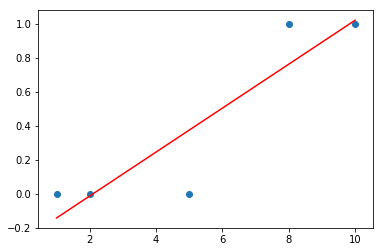

중간이 되는 x좌표 [5.9734883]


In [16]:
import matplotlib
import matplotlib.pyplot as plt

x_data = [10,8,5,2,1]
y_data = [1,1,0,0,0]

X = tf.placeholder(dtype=tf.float32)
Y = tf.placeholder(dtype=tf.float32)

W = tf.Variable(tf.random_normal([1,]), np.float32)
b = tf.Variable(tf.random_normal([1,]), np.float32)

H = X*W+b
# Cost(Loss)function - 최소 제곱법
# Cost 함수의 값이 최소가 되는 W,b를 찾는게 목적
cost = tf.reduce_mean(tf.square(Y-H))
# 기존 cost값에서 한단계 줄임
train = tf.train.GradientDescentOptimizer(learning_rate=0.005).minimize(cost)

# session & 초기화
sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _, cost_value, weight_value, bias_value = sess.run([train,cost,W,b], feed_dict = {X:x_data, Y:y_data})
    if step % 500 == 0 :
        print("cost_value : {}, weight_value : {}, bias_value : {}".format(cost_value, weight_value, bias_value))


plt.plot(x_data, sess.run(W)*x_data+sess.run(b),"r")
plt.scatter(x_data,y_data)
plt.show()
print("중간이 되는 x좌표 {}".format((0.5-sess.run(b))/sess.run(W)))

#### Linear Regression으로 해결 되는 것 같지만 엄한 데이터가 하나 끼어들게 되면 그 점에 대해 Linear를 표현하기 때문에 이상한 그래프가 나오게 됨, 학습이 제대로 되긴하지만 결과가 이상
- 즉 분류문제는 Linear Regression으로 해결할 수 없음

## Sigmoid function 응용
- H의 값이 0과 1사이의 값으로 바인딩 되어야 함
![image](https://user-images.githubusercontent.com/28910538/53705087-4e6e9600-3e65-11e9-8e08-eea8f9bf7169.png)


### Linear Regression의 가설인 XW + b를 시그모이드 에 넣어주면 Logistic Regression
- Linear Regression의 가설에 기반한 cost function을 사용하면 cost(W,b)의 모양이 Convex가 아님, 즉 Gradient descent알고리즘으로 global minima 못찾고 local minima 찾음
- 그 이유는 시그모이드가 지수함수기 때문에 구불구불해짐

### 결론적으로 Hypothesis가 바뀌면 cost함수도 바뀌어야함 
- log함수를 이용해서 costfunction을 바꿔줌
![image](https://user-images.githubusercontent.com/28910538/53705221-259ad080-3e66-11e9-82c6-d7ed45a571d3.png)


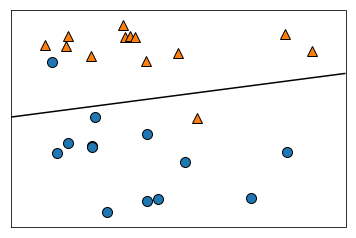

In [34]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import mglearn # Sample Data를 가져오기 위한 utility module
# pip install mglearn
from sklearn.linear_model import LogisticRegression
# warning을 무시하는 필터 적용
import warnings

warnings.filterwarnings(action="ignore")

# random하게 데이터를 만들어 줌
# x : x parameter( 2개)
# y : label (0 or 1)
x,y = mglearn.datasets.make_forge()
model = LogisticRegression()
clf = model.fit(x,y)

# 0이면 동그리마, 1이면 세모
mglearn.discrete_scatter(x[:,0], x[:,1],  y)
# 분류하는 초평면을 그음(하나의 직선) 초평면은 구분지으려는 차원이 n일때 n-1차원의 선
# 로지스틱의 목적은 초평면을 찾는 것, 두개의 데이터를 어떻게 잘 분류하는지 
mglearn.plots.plot_2d_separator(clf, x, fill=False, eps = 0.5)

### Tesorflow를 이용한 Logistic Regression

In [98]:
x_data = np.transpose(np.array([[10,8,3,2,5,2,1],[0,1,3,3,1,0,0]]))
y_data = np.array([1,1,1,1,0,0,0]).reshape((7,1))

print("x_data shape : {}, y_data shape : {}".format(x_data.shape, y_data.shape))

X = tf.placeholder(shape = [None, 2], dtype= tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype= tf.float32)

W = tf.Variable(tf.random_normal([2,1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1,]), dtype=tf.float32)

logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

#cost = -tf.reduce_mean(Y*tf.log(H) - (1-Y)*tf.log(1-H))
# logits에 시그모이드에 들어가기전 logit들어가고 labels에 Y축 데이터가 들어가야함
cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=Y))

train = tf.train.GradientDescentOptimizer(learning_rate=0.005).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(3000):
    _, cost_value, weight_value, bias_value = sess.run([train, cost, W, b], feed_dict = {X:x_data, Y:y_data})
    if step % 500 == 0:
        print("cost : {}, W : {}, b : {}".format(cost_value,weight_value,bias_value))
    # 모델이 얼마나 정확한지를 측정
    # accuracy
    # Hypothesis는 0과1사이의 값으로 떨어지게 됨 => 그 숫자를 가지고 1이랑 가까우면 1, 0이랑가까우면 0
# 논리값을 실수로 변환 
predict = tf.cast(H > 0.5, dtype=tf.float32)
# 실 데이터와 예측 비교해서 
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도 : {}".format(sess.run(accuracy, feed_dict={X:x_data, Y:y_data})))

#predcition
print("예측값 : {}".format(sess.run(predict, feed_dict = {X:[[3,1]]})))

x_data shape : (7, 2), y_data shape : (7, 1)
cost : 0.64541095495224, W : [[0.0131311 ]
 [0.33732712]], b : [0.6457558]
cost : 0.5702019333839417, W : [[0.06114362]
 [0.47376835]], b : [0.23742045]
cost : 0.5107024312019348, W : [[0.10337517]
 [0.5846275 ]], b : [-0.1292463]
cost : 0.46378061175346375, W : [[0.1418172]
 [0.6789118]], b : [-0.45598474]
cost : 0.42662641406059265, W : [[0.17638701]
 [0.7610333 ]], b : [-0.7472113]
cost : 0.3969159722328186, W : [[0.20739463]
 [0.8336691 ]], b : [-1.0078671]
정확도 : 0.8571428656578064
예측값 : [[1.]]


### [Cross Entropy](https://icim.nims.re.kr/post/easyMath/550)

In [103]:
x_data = np.transpose(np.array([[10,8,3,2,5,2,1],[0,1,3,3,1,0,0]]))
y_data = np.array([1,1,1,1,0,0,0]).reshape((7,1))

X = tf.placeholder(shape = [None, 2], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

W = tf.Variable(tf.random_normal([2,1]), dtype = tf.float32)
b = tf.Variable(tf.random_normal([1,]), dtype = tf.float32)



#Hypothesis -> sigmoid function
def sigmoid(data):
    return 1/(1+np.exp(-data))


0.7310585786300049


In [99]:
np.exp(1)

2.718281828459045

## 1. Titanic

In [130]:
### titanic
import pandas as pd
import tensorflow as tf
import numpy as np

file_path = "./data/titanic/titanic_data.csv"
titanic_csv = pd.read_csv(file_path, sep =",")
titanic_csv.head()
# Survived - 생존여부(1이 생존) Pclass - 객실등급(1-3) 1등급이 좋음 Fare - 요금

titanic_csv = titanic_csv[["Pclass", "Sex", "Age","Fare","Survived"]]
print(titanic_csv.shape)
titanic_csv = titanic_csv.dropna(how="any")
print(titanic_csv.shape)
data_x = titanic_csv[["Sex", "Age", "Pclass", "Fare"]]
data_y = titanic_csv["Survived"]
data_x.head()
# 문자열타입을 숫자로 바꾸고, Pclass를 3개로 쪼개줌
# PClass를 3개로 쪼개주는 작업
# 안에 있는 값으로 분할을 해줌 prefix의 이름으로
# 하나의 컬럼을 안에있는 값을 분할해서 더미를 만들어 줌 
Pclass_dummies = pd.get_dummies(data_x["Pclass"], prefix="Pclass")
display(Pclass_dummies.head())
# 붙여줌
data_x = data_x.join(Pclass_dummies)
display(data_x.head())
data_x.drop("Pclass", axis = 1, inplace = True)
display(data_x.head())
# male과 female 분리
Sex_dummies = pd.get_dummies(data_x["Sex"], prefix="Sex")
data_x = data_x.join(Sex_dummies)
data_x.drop("Sex",axis=1, inplace = True)
display(data_x.head())
# 범위 단위로 묶는 것이 좀 더 정확한 학습이 이뤄질 수 있음(나이를 10대 20대~로)

(891, 5)
(891, 5)


,Pclass_1,Pclass_2,Pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1


,Sex,Age,Pclass,Fare,Pclass_1,Pclass_2,Pclass_3
0,male,22.0,3,7.2500,0,0,1
1,female,38.0,1,71.2833,1,0,0
2,female,26.0,3,7.9250,0,0,1
3,female,35.0,1,53.1000,1,0,0
4,male,35.0,3,8.0500,0,0,1


,Sex,Age,Fare,Pclass_1,Pclass_2,Pclass_3
0,male,22.0,7.2500,0,0,1
1,female,38.0,71.2833,1,0,0
2,female,26.0,7.9250,0,0,1
3,female,35.0,53.1000,1,0,0
4,male,35.0,8.0500,0,0,1


,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,22.0,7.2500,0,0,1,0,1
1,38.0,71.2833,1,0,0,1,0
2,26.0,7.9250,0,0,1,1,0
3,35.0,53.1000,1,0,0,1,0
4,35.0,8.0500,0,0,1,0,1


In [146]:
from sklearn.preprocessing import MinMaxScaler

# training data set 
# min-max scale을 통해 정규화
x_data = MinMaxScaler().fit_transform(data_x.values)
# 몇갠지 알 수 없을때는 -1을 넣어 줌
y_data = data_y.values.reshape(-1,1)

X = tf.placeholder(shape = [None, 7], dtype=tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype=tf.float32)

W = tf.Variable(tf.random_normal([7,1]), dtype=tf.float32)
b = tf.Variable(tf.random_normal([1,]), dtype=tf.float32)

logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=logit, labels=Y))

train = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10000):
    _, cost_value, weight_value, bias_value = sess.run([train, cost, W, b], feed_dict = {X:x_data, Y:y_data})
    if step % 2000 == 0:
        print("cost : {}, W : {}, b : {}".format(cost_value, weight_value, bias_value))

predict = tf.cast(H > 0.5, dtype=tf.float32)
# 실 데이터와 예측 비교해서 
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("정확도 : {}".format(sess.run(accuracy, feed_dict={X:x_data, Y:y_data})))


cost : 1.0868809223175049, W : [[ 1.5924071 ]
 [ 0.6015989 ]
 [-1.1613861 ]
 [ 0.04605121]
 [ 1.3449289 ]
 [-1.1103749 ]
 [-1.4564322 ]], b : [0.9647376]
cost : 0.468779057264328, W : [[ 0.50628126]
 [ 0.9208515 ]
 [ 0.84220105]
 [ 0.20707281]
 [-0.8087892 ]
 [ 0.03467776]
 [-2.5905895 ]], b : [0.9756294]
cost : 0.46066197752952576, W : [[-0.34715882]
 [ 0.9454647 ]
 [ 0.99402976]
 [ 0.24315305]
 [-0.8150368 ]
 [ 0.11459317]
 [-2.4888573 ]], b : [1.1572934]
cost : 0.45652952790260315, W : [[-0.958086  ]
 [ 0.94526035]
 [ 1.0931245 ]
 [ 0.27495542]
 [-0.8164133 ]
 [ 0.17193542]
 [-2.4166799 ]], b : [1.2868181]
cost : 0.4543876647949219, W : [[-1.3972468 ]
 [ 0.9306798 ]
 [ 1.1672212 ]
 [ 0.2973455 ]
 [-0.8191814 ]
 [ 0.21650952]
 [-2.3675356 ]], b : [1.3805432]
정확도 : 0.7878788113594055


## 2. Admission
- 70프로를 training용으로 사용
- 나머지 30프로를 test용으로 사용

In [199]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

file_path = "./data/admission/admission.csv"
admission_csv = pd.read_csv(file_path, sep=",")
admission_csv.head()
# drop na
admission_csv = admission_csv[["gre","gpa","rank","admit"]]
admission_csv = admission_csv.dropna(how="any")

# x y 나누고 랭크를 의미있는 값으로 만들기 위해 더미로 분할하고 열에 추가
data_x = admission_csv[["gre","gpa","rank"]]
data_y = admission_csv["admit"]
rank_dummie = pd.get_dummies(data_x["rank"], prefix="rank")
data_x = data_x.join(rank_dummie)
data_x.drop("rank", axis=1, inplace = True)

# min_max 정규화
x_data = MinMaxScaler().fit_transform(data_x.values)
y_data = data_y.values.reshape(-1,1)

train_x_data = x_data[:int((x_data.shape[0])*0.7),]
train_y_data = y_data[:int((x_data.shape[0])*0.7),]
test_x_data = x_data[int((x_data.shape[0])*0.7):,]
test_y_data = y_data[int((x_data.shape[0])*0.7):,]
print("training set shape x,y: {},{} test set shape x,y : {},{}"
      .format(train_x_data.shape, train_y_data.shape, test_x_data.shape, test_y_data.shape))

X = tf.placeholder(shape = [None, 6], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 1], dtype = tf.float32)

W = tf.Variable(tf.random_normal([6,1]), dtype = tf.float32)
b = tf.Variable(tf.random_normal([1,]), dtype = tf.float32)

logit = tf.matmul(X,W) + b
H = tf.sigmoid(logit)

cost = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits= logit, labels=Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10000):
    _, cost_value, weight_value, bias_value = sess.run([train, cost, W, b], feed_dict = {X:train_x_data, Y:train_y_data})
    if step % 2000 == 0:
        print("cost : {}, weight : {}, bias = {}".format(cost_value, weight_value, bias_value))

predict = tf.cast(H > 0.5, dtype = tf.float32)
correct = tf.equal(predict, Y)
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
print("accuracy : {}".format(sess.run(accuracy, feed_dict = {X:test_x_data, Y:test_y_data})))



training set shape x,y: (280, 6),(280, 1) test set shape x,y : (120, 6),(120, 1)
cost : 0.6269745826721191, weight : [[-0.45814824]
 [ 0.68744576]
 [ 0.571154  ]
 [-0.5333933 ]
 [ 0.23823152]
 [-0.7123617 ]], bias = [-0.96285427]
cost : 0.5563417077064514, weight : [[ 0.5954013 ]
 [ 1.1184121 ]
 [ 0.79085445]
 [ 0.00561967]
 [-0.83178824]
 [-1.0497302 ]], bias = [-1.6115267]
cost : 0.5507782697677612, weight : [[ 1.1430627 ]
 [ 1.3101953 ]
 [ 0.6804746 ]
 [-0.07815063]
 [-0.9426115 ]
 [-1.1491104 ]], bias = [-2.0158792]
cost : 0.5489241480827332, weight : [[ 1.4687641 ]
 [ 1.4028236 ]
 [ 0.61524916]
 [-0.12593421]
 [-1.0063133 ]
 [-1.2024832 ]], bias = [-2.245964]
cost : 0.5482715368270874, weight : [[ 1.6668828 ]
 [ 1.4478099 ]
 [ 0.5787051 ]
 [-0.15390223]
 [-1.0439361 ]
 [-1.2345194 ]], bias = [-2.3801353]
accuracy : 0.6833333373069763


#### conda install statsmodels
- 통해서 통계적으로 해결 가능

### ML 정리
- 학습의 순서
    - 1. 데이터를 load하고
    - 2. 필요한 데이터만을 추출
    - 3. 필요한 파라미터만 추출
    - 3.1 범주 데이터를 정제, 의미있는 데이터로 변환(pd.dummies)
    - 4. 값의 단위를 맞춰주기위한 정규화,표준화
    - 5. 적절한 학습모델을 선정하고 학습
    - 5-1. 분류 모델을 사용했을 때 정확도를 측정
        - 경향을 예측한다든지, 분류를 한다든지
- Supervised Learning (지도 학습)
    - 학습 데이터셋에 결과 label이 있는 데이터를 다룰 때
    - Regression :  파라미터 간 관계를 통해 어떤 경향을 예측, Logistic은 예외적으로 분류가 가능
        - 1. Simple Linear Regression
            - 독립변수(입력 parameter)가 1개인 것을 지칭
            - Hypothesis => H = W * x + b
        - 2. Multiple Linear Regression
            - 독립변수가 2개 이상인 것을 지칭
            - Hypothesis => H = XW + b 
                - Matrix 형태로 표현 tf.matmul로 연산(행렬 곱)
        - 3. Logistic Regression
            - 회귀모델에서 예외적으로 값을 예측하는 것이 아닌 분류가 가능
                - binary classification : 둘 중 하나로 분류
            - Hypothesis => sigmoid(XW + b)
            - 정확도를 측정할 수 있음
- Unsupervised Learning (비지도 학습)
    - 학습 데이터셋에 결과 label이 없는 데이터를 다룰 때 

### Multinomial Classification
- logistic은 둘 중 하나로 분류하는 거였지만 Multinomail Classification은 여러개로 분류하는, 여러 개 중의 하나를 찾는
- 분포되어 있는 데이터를 구분 짓는 가상의 선(hyperplane)을 찾는 것이 logistic classification이 하의 목적이고 목표
- hyperplane은 둘 중에 하나를 선택하는 선
    - A냐 A가 아니냐
    - B냐 B가 아니냐
    - C냐 C가 아니냐
- 즉 Multinomial Classfication은 Logistic이 여러개 합쳐져 있는 것임 => 그 선 하나하나를 찾는게 각 Logistic hyperplane을 찾는 것
- 3개의 Logistic을 합쳐서 matrix 하나로 표현
![image](https://user-images.githubusercontent.com/28910538/53772242-044ee880-3f29-11e9-8076-68cf93085eca.png)
- 근데 Multinomial은 확률적으로 생각해서 접근해야함
    - Logistic은 인지 아닌지
    - Multinomial은 어떤 값이 될 확률이 높은지
- 때문에 sigmoid를 사용하지 않고 softmax 사용


In [33]:
import tensorflow as tf
import pandas as pd
import numpy as np

data_x1 = [10,8,7,6,7,3,2]
data_x2 = [7,8,8,3,5,5,4]
data_x3 = [8,9,2,9,7,6,3]
data_x4 = [5,4,3,3,4,2,1]
data_y = ["A","A","B","B","B","C","C"]
# one hot encoding
y_data = pd.get_dummies(pd.DataFrame(data_y), prefix="y").values
data_x = np.vstack((data_x1,data_x2,data_x3,data_x4))
x_data = np.transpose(data_x)
print("x_data.shape : {}, y_data.shape : {}".format(x_data.shape, y_data.shape))

X = tf.placeholder(shape = [None, 4], dtype= tf.float32)
Y = tf.placeholder(shape = [None, 3], dtype = tf.float32)

W = tf.Variable(tf.random_normal([4,3]), dtype = tf.float32)
b = tf.Variable(tf.random_normal([3,]), dtype = tf.float32)

logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit, labels = Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.05).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10000):
    _, cost_value, weight_value, bias_value = sess.run([train, cost, W, b], feed_dict={X:x_data, Y:y_data})
    if step % 2000 == 0:
        print("cost : {}, W : {}, b : {}".format(cost_value, weight_value, bias_value))
# H => [[0.3 0.6 0.1 ]] 이런 형태로 나옴
print(sess.run(H,feed_dict ={X:x_data, Y:y_data}))
# 가장 큰 값이 몇번째인지 index를 알려줌
# 어떤 축을 기준으로 뽑는지 - 열 방향을 기준으로 큰 값을 뽑아줘야 함
predict = tf.argmax(H, axis = 1)
# Y데이터도 argmax로 집어줘야 비교 가능
correct = tf.equal(predict, tf.argmax(Y, axis = 1))
# true false를 숫자로 바꿔주기 위해 cast를 하고 그 평균을 냄
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))

print("accuracy = {}".format(sess.run(accuracy, feed_dict={X:x_data, Y:y_data})))

result = sess.run(predict, feed_dict = {X:[[5,3,2,9]]})
if result[0] == 0:
    print("A")
elif result[0] == 1:
    print("B")
else:
    print("C")


x_data.shape : (7, 4), y_data.shape : (7, 3)
cost : 2.287501096725464, W : [[ 0.5513545   0.7679173   0.12720793]
 [ 0.39638987  0.11603027  0.7041354 ]
 [ 0.39199615  0.68154055 -0.01868953]
 [ 1.1348362  -0.02498883  1.4697698 ]], b : [ 0.2403025   1.9340199  -0.56199384]
cost : 0.16442953050136566, W : [[ 1.8151956   1.8005291  -2.1692448 ]
 [-0.16405211 -0.8715387   2.2521467 ]
 [ 0.30472693 -0.18561292  0.9357351 ]
 [ 1.0243059   0.89594626  0.6593688 ]], b : [-3.7848468   4.9313188   0.46585763]
cost : 0.10006435960531235, W : [[ 2.2782516   1.8119246  -2.6436975 ]
 [-0.32029736 -1.133885    2.6707385 ]
 [ 0.33951908 -0.29639003  1.0117176 ]
 [ 0.86638904  1.2540704   0.45916003]], b : [-5.5490093   6.418152    0.74318415]
cost : 0.0708198994398117, W : [[ 2.5642803   1.8291277  -2.946929  ]
 [-0.41047537 -1.3104359   2.9374664 ]
 [ 0.36381614 -0.37435675  1.0653818 ]
 [ 0.78176594  1.4681526   0.32970086]], b : [-6.75321    7.4437885  0.9217517]
cost : 0.05444733425974846, W : [

### bmi
- label 0은 마른체형
- label 1은 정상
- label 2는 비만
- label, 키, 몸무게

In [91]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings(action="ignore")
file_path = "./data/bmi/bmi.csv"
# 3줄 건너서
bmi_csv = pd.read_csv(file_path, sep=",", skiprows=3)
# dropna
bmi_csv = bmi_csv.dropna(how="any")
# one-hot encoding
# tf.one_hot(data_y, 3) 범주 지정해주고 찍으면 one-hot encoding
data_y = pd.get_dummies(bmi_csv["label"], prefix="label")
y_data = data_y.values
display(bmi_csv.head())
data_x = bmi_csv[["height","weight"]]

scaler = MinMaxScaler()
# scaler.fit_transform~ 데이터에 맞춰서 최대값 최소값을 맞춰서 값을 바꿨는데
# 이렇게 하면 그 최대갑 최소값을 scaler가 갖고있음
# scaler.transform~은 scaler가 갖고있는 최대 최소로 데이터를 바꿈
x_data = scaler.fit_transform(data_x.values)
print("x_data.shape : {}, y_data.shape : {}".format(x_data.shape, y_data.shape))

count = int(x_data.shape[0]*0.7)
train_x = x_data[:count,:]
train_y = y_data[:count,:]
test_x = x_data[count:,:]
test_y = y_data[count:,:]

X = tf.placeholder(shape = [None, 2], dtype = tf.float32)
Y = tf.placeholder(shape = [None, 3], dtype = tf.float32)

W = tf.Variable(tf.random_normal([2,3]), dtype = tf.float32)
b = tf.Variable(tf.random_normal([3,]), dtype = tf.float32)

logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits = logit, labels = Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.1).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(10000):
    _, cost_value, weight_value, bias_value = sess.run([train, cost, H, b], feed_dict={X:train_x, Y:train_y})
    if step % 2000 == 0:
        print("cost : {}, W : {}, b : {}".format(cost_value, weight_value, bias_value))


predict = tf.argmax(H, axis = 1)
correct = tf.equal(predict, tf.argmax(Y, axis = 1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype=tf.float32))
        
print("accuracy = {}".format(sess.run(accuracy, feed_dict = {X:test_x, Y:test_y})))




,label,height,weight
0,1,188,71
1,2,161,68
2,0,178,52
3,2,136,63
4,1,145,52


x_data.shape : (20000, 2), y_data.shape : (20000, 3)
cost : 2.2703378200531006, W : [[0.00271652 0.10096955 0.8963139 ]
 [0.00631808 0.11205374 0.8816282 ]
 [0.00634119 0.14585413 0.8478046 ]
 ...
 [0.00802377 0.17331438 0.8186618 ]
 [0.00331152 0.1040233  0.8926652 ]
 [0.01054598 0.12758102 0.861873  ]], b : [-2.2606046 -0.8520236  0.3634667]
cost : 0.41480886936187744, W : [[0.27892488 0.59730417 0.12377091]
 [0.05537765 0.40279204 0.54183036]
 [0.6665262  0.3063569  0.02711692]
 ...
 [0.87810487 0.11812655 0.00376848]
 [0.22056375 0.59721845 0.1822178 ]
 [0.04195669 0.31254897 0.64549434]], b : [-1.5937132  -0.91911197 -0.23633528]
cost : 0.3280487656593323, W : [[2.47161970e-01 6.75162435e-01 7.76755959e-02]
 [2.29402017e-02 4.06964153e-01 5.70095658e-01]
 [7.28664041e-01 2.63426781e-01 7.90919177e-03]
 ...
 [9.37074661e-01 6.24989197e-02 4.26406303e-04]
 [1.75683513e-01 6.91428125e-01 1.32888302e-01]
 [1.46419145e-02 2.93803453e-01 6.91554666e-01]], b : [-2.0243669  -0.62468517 -0

sess = tf.Session()  
session return하기때문에 eval 통해 값   
tf.one_hot(train, 범주갯수).eval(session=sess)  
= sess.run(tf.one_hot(train, 범주갯수))  

In [94]:
print(sess.run(predict, feed_dict = {X:scaler.transform([[184,94]])}))

[2]


### MNIST - Multinomial Classification
- 약 5만 5천개의 28x28 이미지를 입력으로 받음
- x parameter의 shape => (55000, 784)
- y label의 shape은 => (55000, 10)

Extracting ./data/mnist\train-images-idx3-ubyte.gz
Extracting ./data/mnist\train-labels-idx1-ubyte.gz
Extracting ./data/mnist\t10k-images-idx3-ubyte.gz
Extracting ./data/mnist\t10k-labels-idx1-ubyte.gz
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


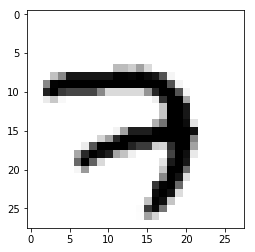

array([7], dtype=int64)

In [111]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

#1. Data Loading
# y쪽 lable을 one-hot형태로 불러들임
mnist = input_data.read_data_sets("./data/mnist", one_hot=True)
# mnist.train.num_examples
# mnist.train.images.shape
print(mnist.train.labels[0])
plt.imshow(mnist.train.images[0].reshape(28,28), cmap="Greys", interpolation="nearest")
plt.show()
# argmax는 2차원 이상이여야 가능?
sess = tf.Session()
sess.run(tf.argmax(mnist.train.labels[0].reshape(-1,10), 1))

In [116]:
mnist.train.labels[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.])

In [129]:
X = tf.placeholder(shape=[None, 28*28], dtype = tf.float32)
Y = tf.placeholder(shape=[None, 10], dtype = tf.float32)

W = tf.Variable(tf.random_normal([28*28,10]), dtype = tf.float32, name = "weight")
b = tf.Variable(tf.random_normal([10,]), dtype = tf.float32, name = "bias")

logit = tf.matmul(X,W) + b
H = tf.nn.softmax(logit)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=logit, labels=Y))
train = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

# 너무 큰 데이터는 한번에 읽어들일 수 없음, 배치 처리
# 1 epoch은 가지고있는 학습데이터 전체를 한번 학습시키는 것 몇번을 학습할 건가
train_epoch = 30
# 한번에 읽어들일 데이터의 크기
batch_size = 100

for step in range(train_epoch):
    num_of_iter = int(mnist.train.num_examples / batch_size)
    for i in range(num_of_iter):
        # next batch 실제로 구현해야 함
        batch_x, batch_y = mnist.train.next_batch(batch_size)
        _, cost_value, weight_value = sess.run([train,cost,W], feed_dict={X:batch_x, Y:batch_y})
    if step % 5 == 0:
        print("cost : {}".format(cost_value))

predict = tf.argmax(H, axis = 1)
correct = tf.equal(predict, tf.argmax(Y, axis = 1))
accuracy = tf.reduce_mean(tf.cast(correct, dtype = tf.float32))
print("accuracy : {}".format(sess.run(accuracy, feed_dict={X:mnist.test.images, Y:mnist.test.labels})))

cost : 0.7262434363365173
cost : 0.44190797209739685
cost : 0.33254939317703247
cost : 0.3848639726638794
cost : 0.3176891803741455
cost : 0.344063401222229
accuracy : 0.9168000221252441
